<a href="https://colab.research.google.com/github/ritamsarkar2000/ML/blob/master/linear_model_with_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from six.moves import  urllib

import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

In [2]:
#loading the dataset

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [3]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [4]:
train_label = dftrain.pop('survived')
eval_label = dfeval.pop('survived')

In [5]:
dftrain.shape

(627, 9)

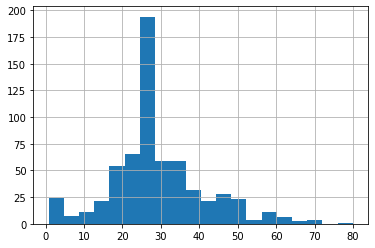

In [6]:
plt.hist(dftrain.age, bins=20)
plt.grid()
plt.show()

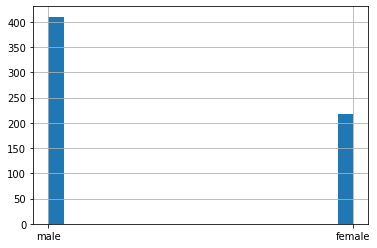

In [7]:
plt.hist(dftrain.sex, bins=20)
plt.grid()
plt.show()

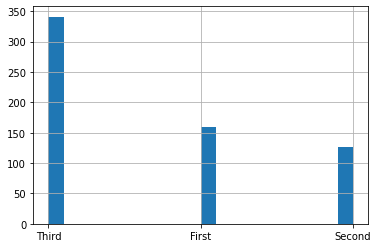

In [8]:
plt.hist(dftrain['class'], bins= 20)
plt.grid()
plt.show()

In [9]:
train_label

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [10]:
Catagorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
numarical_columns = ['age', 'fare']

feature_column = []

for feature_name in Catagorical_columns:
  vocabulary = dftrain[feature_name].unique()
  feature_column.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in numarical_columns:
  feature_column.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [11]:
feature_column

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

In [12]:
def in_fn(train_data, training_label, training= True, batch_size=32, repeat=10):
  ds = tf.data.Dataset.from_tensor_slices((dict(train_data), training_label))
  if training:
    ds = ds.shuffle(1000)
  return ds.batch(batch_size).repeat(repeat)
  

In [13]:
linear_model = tf.estimator.LinearClassifier(feature_columns=feature_column)
linear_model.train(input_fn = lambda: in_fn(dftrain, train_label, training= True))
eval_result= linear_model.evaluate(input_fn= lambda: in_fn(dfeval, eval_label, training= False, repeat=1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp32l9q2fh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

In [14]:
print(eval_result)

{'accuracy': 0.74242425, 'accuracy_baseline': 0.625, 'auc': 0.8305785, 'auc_precision_recall': 0.8004279, 'average_loss': 0.4767555, 'label/mean': 0.375, 'loss': 0.46925116, 'precision': 0.6597938, 'prediction/mean': 0.3962706, 'recall': 0.64646465, 'global_step': 200}


In [15]:
ageXsex = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size= 100)
linear_model = tf.estimator.LinearClassifier(feature_columns= feature_column + [ageXsex])
linear_model.train(input_fn= lambda: in_fn(dftrain, train_label, training= True))
results = linear_model.evaluate(input_fn= lambda: in_fn(dfeval, eval_label, training= False, repeat= 1))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvw0qxoc6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

In [16]:
print(results)

{'accuracy': 0.74242425, 'accuracy_baseline': 0.625, 'auc': 0.829997, 'auc_precision_recall': 0.7603283, 'average_loss': 0.593598, 'label/mean': 0.375, 'loss': 0.5933786, 'precision': 0.6148148, 'prediction/mean': 0.5395239, 'recall': 0.83838385, 'global_step': 200}


In [17]:
pred_dicts = list(linear_model.predict(input_fn= lambda: in_fn(dfeval, eval_label, training= False, repeat=1)))
probs=[]
for pred in pred_dicts:
  probs.append(pd.Series([pred['probabilities'][1]]))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvw0qxoc6/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


(0.0, 1.05)

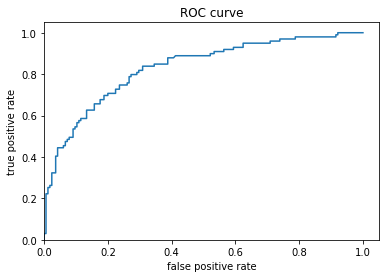

In [18]:
import sklearn
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(eval_label, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
